In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn.datasets import load_iris

dataset= load_iris()

In [7]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [8]:
import seaborn as sns

In [9]:
df= pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
# df=sns.load_dataset('iris')


0 - Iris-Setosa

1- Iris-Versicolour

2 - Iris-Virginica

In [12]:
dataset.target 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
X= df.copy()
y=dataset.target

In [14]:
X,y

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 array([0, 0, 0, 0, 0, 0,

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.33,random_state=42)

In [16]:
X_train.shape , X_test.shape 

((100, 4), (50, 4))

No Standardization for decision tree because it first standardize then split to make decision tree so it wont have any benifit over time complexity

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
# Post pruning
treeclassifier = DecisionTreeClassifier()

In [19]:
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


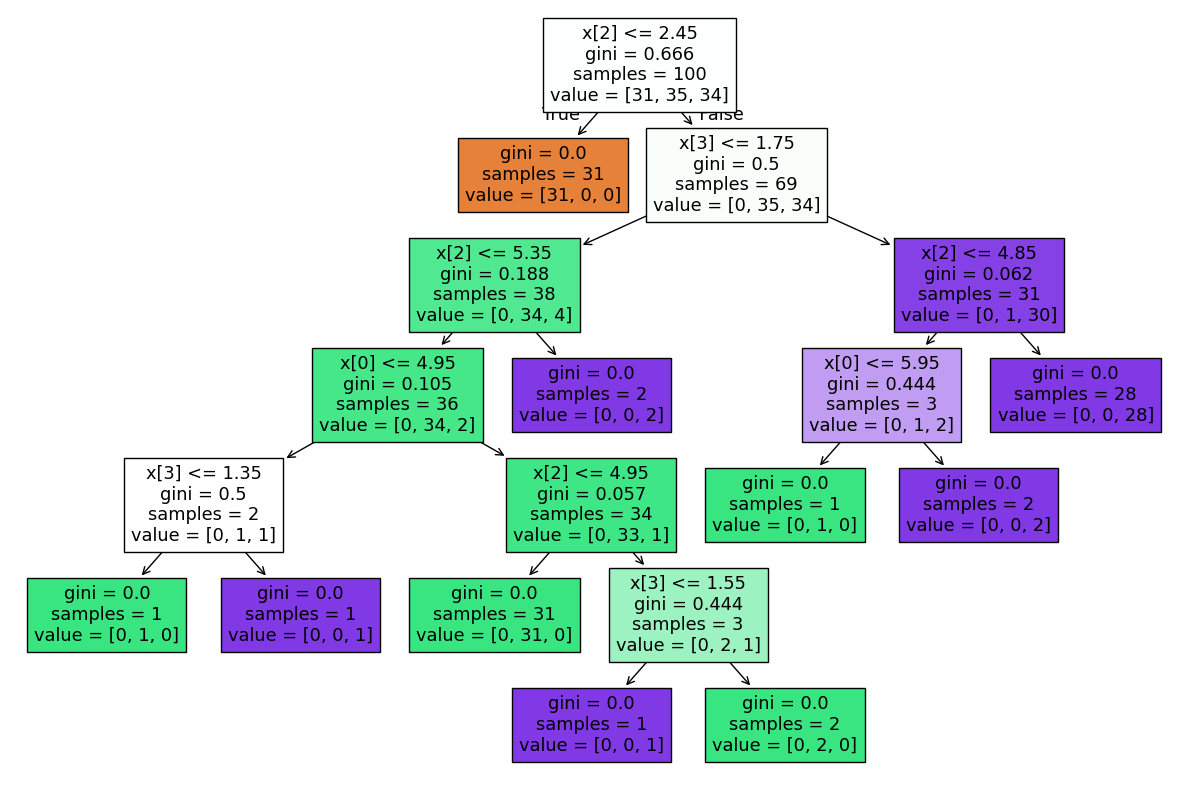

In [21]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)
plt.show()

at depth 2 we have a major split 

at left should be 2nd category

at right output should be 3rd category

0,1,2 depth

so we can apply max depth at level 2nd depth

In [22]:
# post pruning with max_depth =2
treeclassifier= DecisionTreeClassifier(max_depth=2)

treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

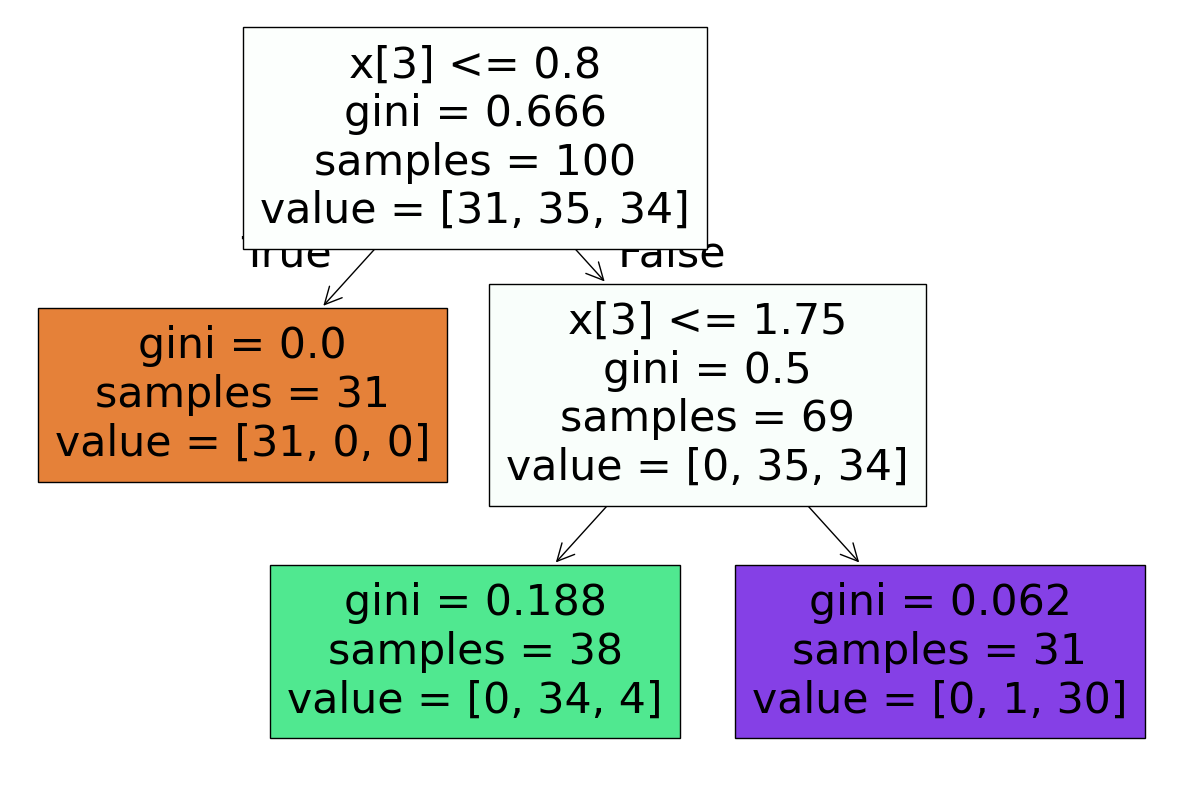

In [23]:
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)
plt.show()

above one would have overfit the data so we used this decision tree

In [24]:
# prediction
y_pred=  treeclassifier.predict(X_test)

In [25]:
y_pred 

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [26]:
# now we can find accuracy etc of this

from sklearn.metrics import accuracy_score,classification_report

print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test)) 

0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# Decision tree pre pruning and hyper paramter tuning for huge data

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
param={
    'criterion' :['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2'] 
}

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
clf= GridSearchCV(DecisionTreeClassifier(),param_grid=param,cv=5,scoring='accuracy')

In [31]:
# train the data

clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [32]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [33]:
best_model= clf.best_estimator_ 

In [38]:
y_pred=best_model.predict(X_test)

In [40]:
score=accuracy_score(y_pred,y_test)

In [41]:
score

0.98